<h2> Perform EDA and Develop Machine Learning (Regression) Model to Predict Bike Rentals </h2>

**Citation:** The data that were used is derived from Capital Bikeshare in accordance with the published license agreement: https://capitalbikeshare.com/system-data.

**Steps for Performing Exploratory Data Analysis (EDA):**
1. Check missing data 
2. Convert raw data to numerical and categorical features 
3. Descriptive statistics of numerical features + label 
4. Histogram / boxplot of label 
5. Histogram for numerical features 
6. Bar plots for categorical features
7. Scatter plots: numerical features vs. label with correlation 
8. Boxplots: categorical features vs. label
    

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load data 
url = 'https://raw.githubusercontent.com/fsongman/Machine-Learning-Bike-Rentals-Predictions/main/daily-bike-share.csv?token=GHSAT0AAAAAACJQO3NWMRIGK2O2DJFNQ4ISZJ34RUA'
df = pd.read_csv(url)
df.head(5) 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [65]:
#Check N/As 
df.isnull().value_counts()

instant  dteday  season  yr     mnth   holiday  weekday  workingday  weathersit  temp   atemp  hum    windspeed  rentals
False    False   False   False  False  False    False    False       False       False  False  False  False      False      731
Name: count, dtype: int64

**Features:** <br>
**instant:** A unique row identifier <br>
**dteday:** The date on which the data was observed; in this case, the data was collected daily, so there's one row per date.<br>
**season:** A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)<br>
**yr:** The year of the study in which the observation was made (the study took place over two years: year 0 represents 2011, and year 1 represents 2012)<br>
**mnth:** The calendar month in which the observation was made (1:January ... 12:December)<br>
**holiday:** A binary value indicating whether or not the observation was made on a public holiday) <br>
**weekday:** The day of the week on which the observation was made (0:Sunday ... 6:Saturday) <br>
**workingday:** A binary value indicating whether or not the day is a working day (not a weekend or holiday) <br>
**weathersit:** A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)<br>
**temp:** The temperature in celsius (normalized)<br>
**atemp:** The apparent ("feels-like") temperature in celsius (normalized) <br>
**hum:** The humidity level (normalized)<br>
**windspeed:** The windspeed (normalized)<br>

**Dependant variable (label):**<br>
**rentals:** The number of bicycle rentals recorded.<br>

<h3>Exploratory Data Analysis (EDA) </h3>

In [66]:
#Convert month/day/year to day as categoritcal feature
df['day'] = pd.DatetimeIndex(df['dteday']).day
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [67]:
#Get descriptive statistics 
num_features = ['temp', 'atemp', 'hum', 'windspeed']
df[num_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Text(0.5, 0.98, 'Rentals')

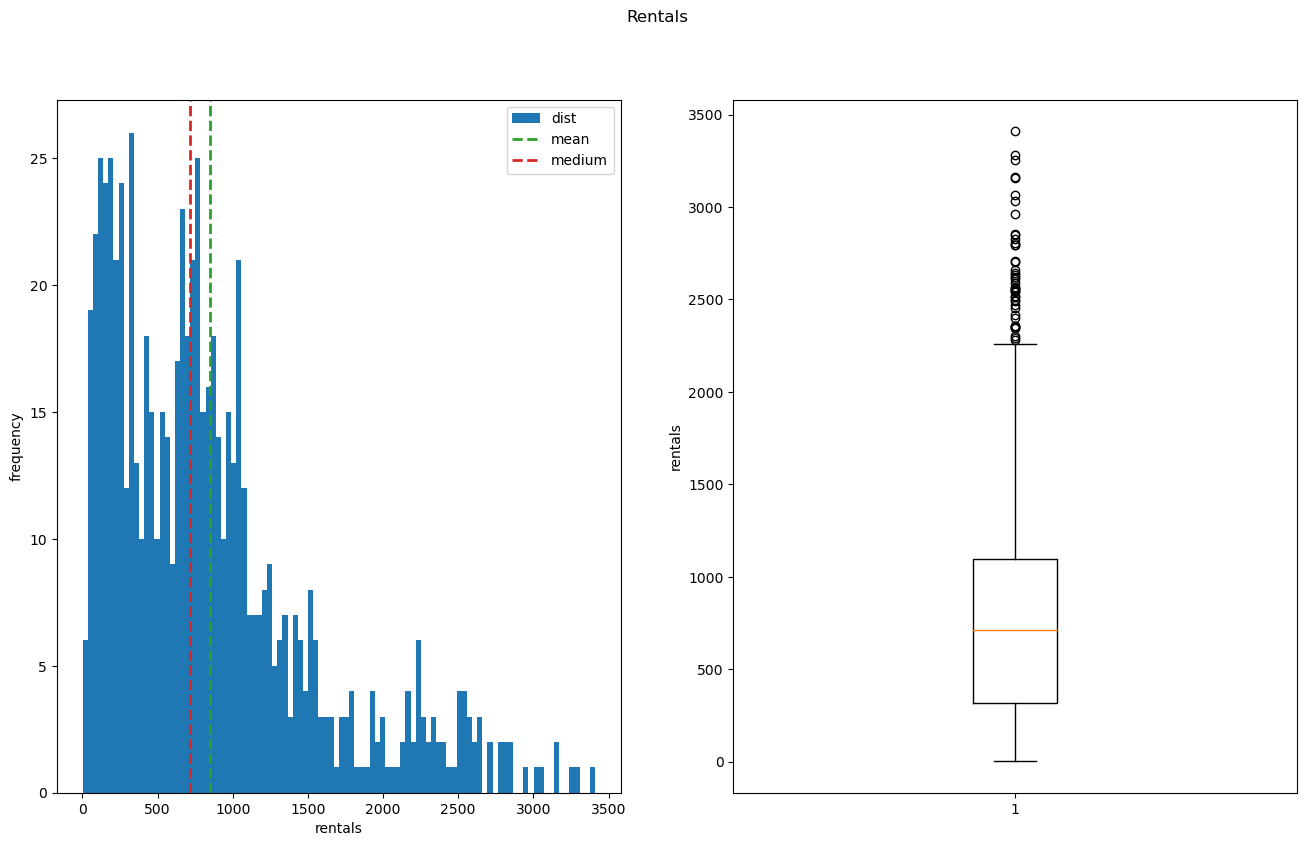

In [68]:
# Histogram and boxplot for label 
fig, ax = plt.subplots(1, 2, figsize = (16, 9))
ax[0].hist(df.rentals, bins = 100, label = 'dist')
ax[0].set_xlabel('rentals')
ax[0].set_ylabel('frequency')
ax[0].axvline(df.rentals.mean(), color = 'tab:green', linewidth = 2, linestyle = 'dashed', label = 'mean')
ax[0].axvline(df.rentals.median(), color = 'tab:red', linewidth = 2, linestyle = 'dashed', label = 'medium')
ax[0].legend(title = '')

ax[1].boxplot(df.rentals)
ax[1].set_ylabel('rentals')
#ax[1].set_ylabel('frequency')
fig.suptitle('Rentals')

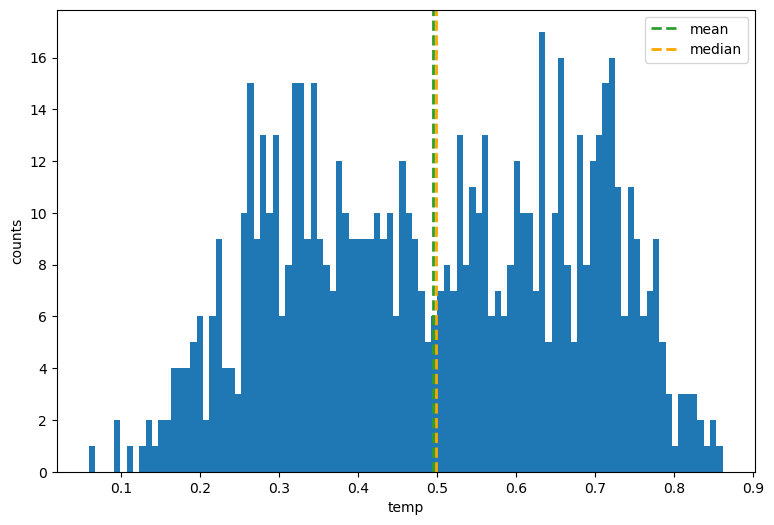

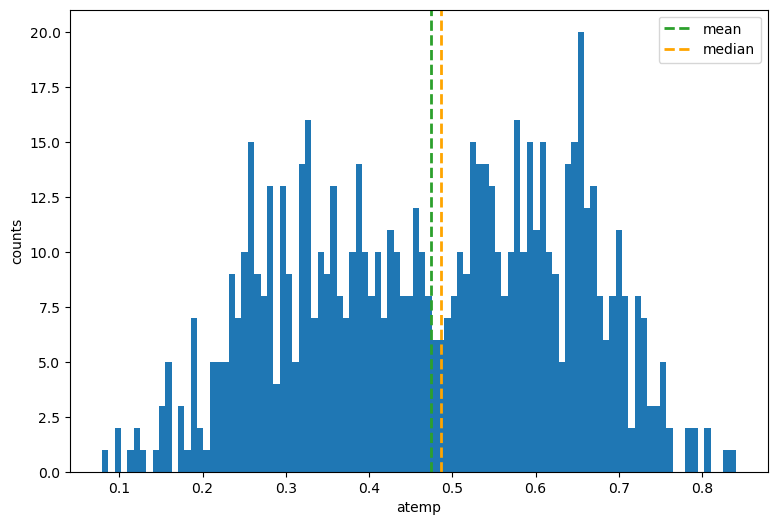

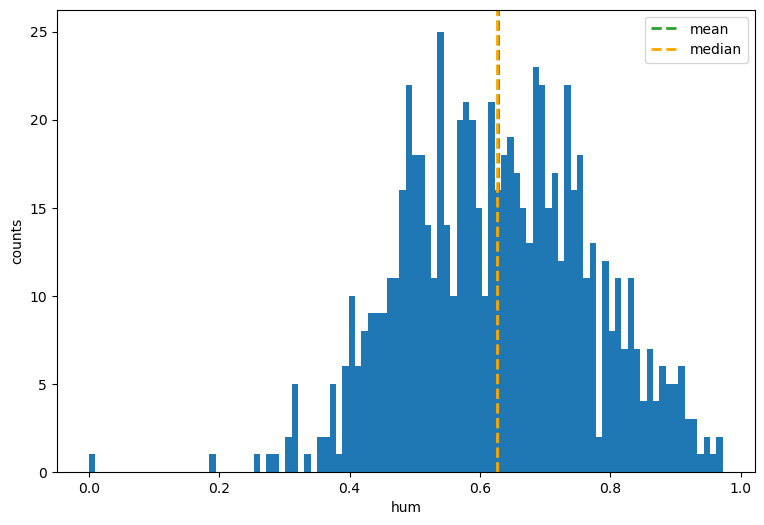

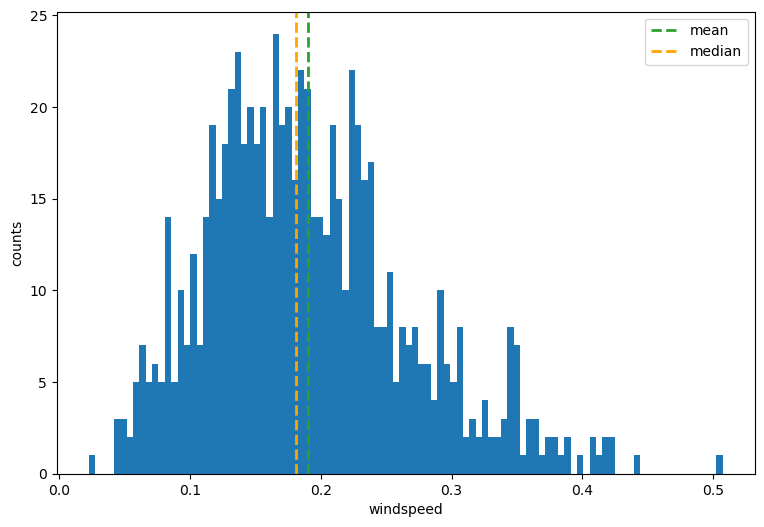

In [69]:
# Histograms for numerical features 
for col in num_features:
    fig, ax = plt.subplots(1, 1, figsize = (9, 6))
    ax.hist(df[col], bins = 100)
    ax.set_xlabel(col)
    ax.set_ylabel('counts')
    ax.axvline(df[col].mean(), color = 'tab:green', linewidth = 2, linestyle = 'dashed', label = 'mean')
    ax.axvline(df[col].median(), color = 'orange', linewidth = 2, linestyle = 'dashed', label = 'median')
    ax.legend(title = '')
plt.show()

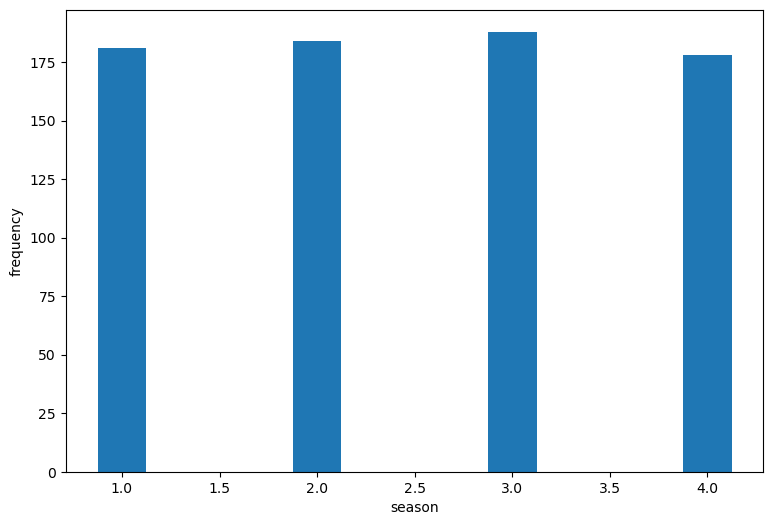

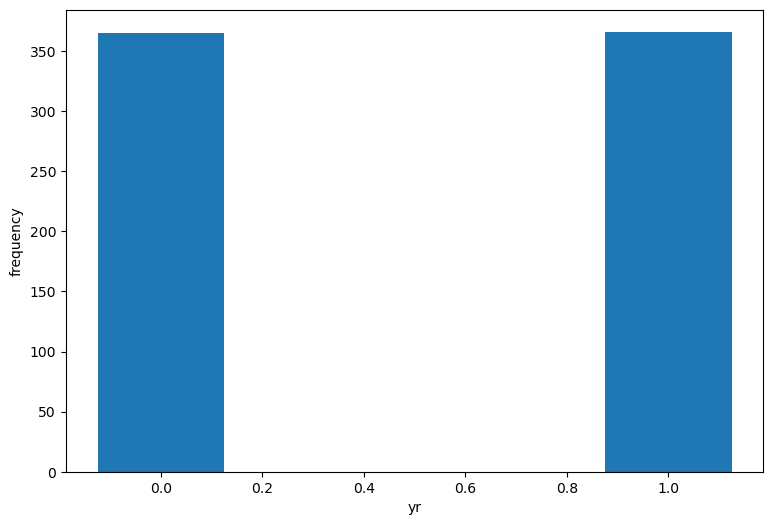

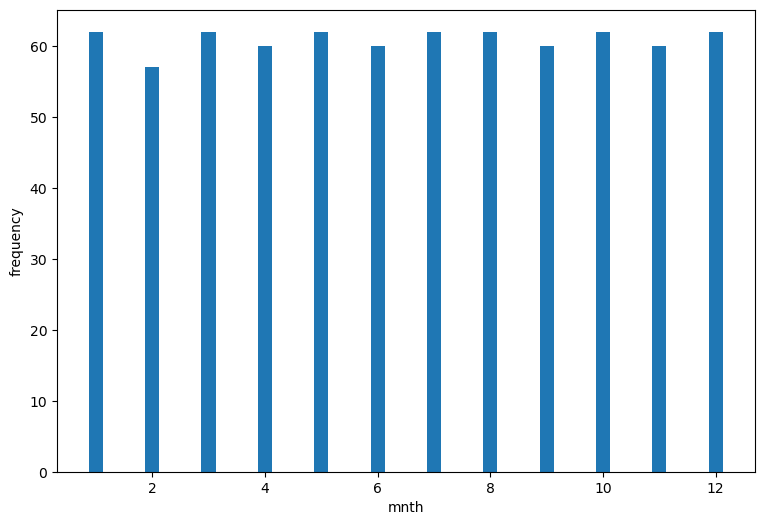

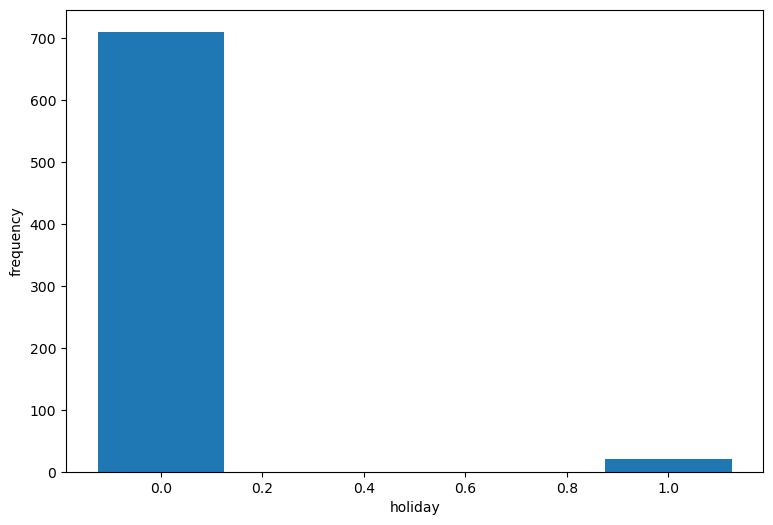

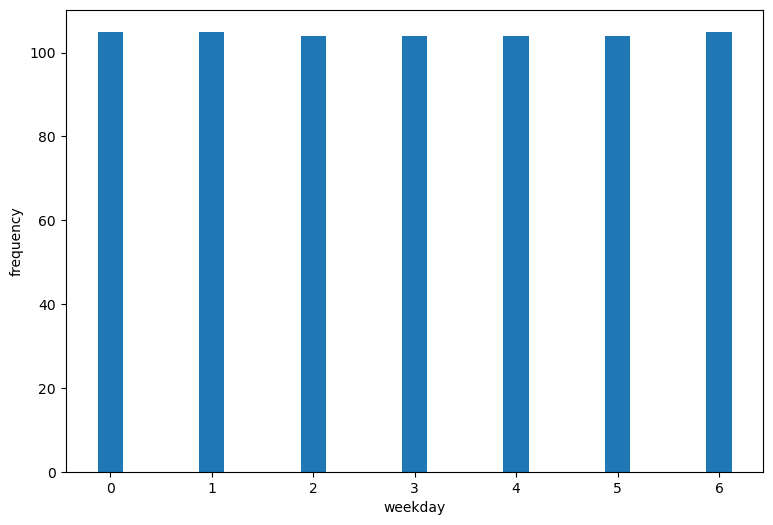

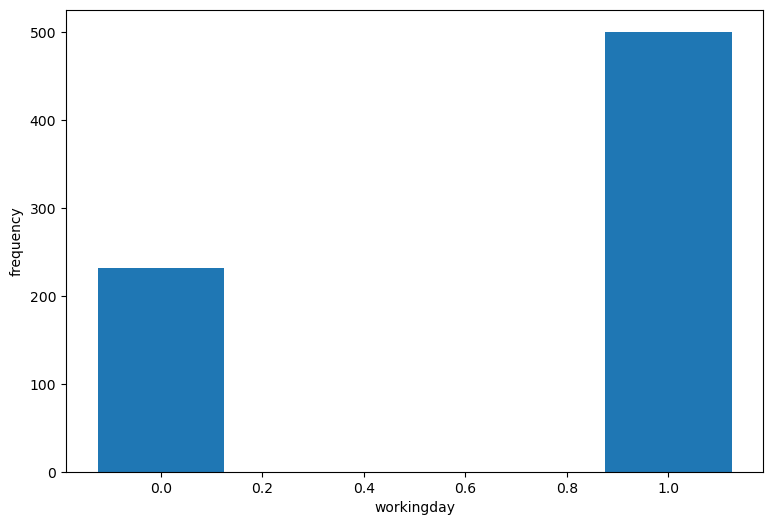

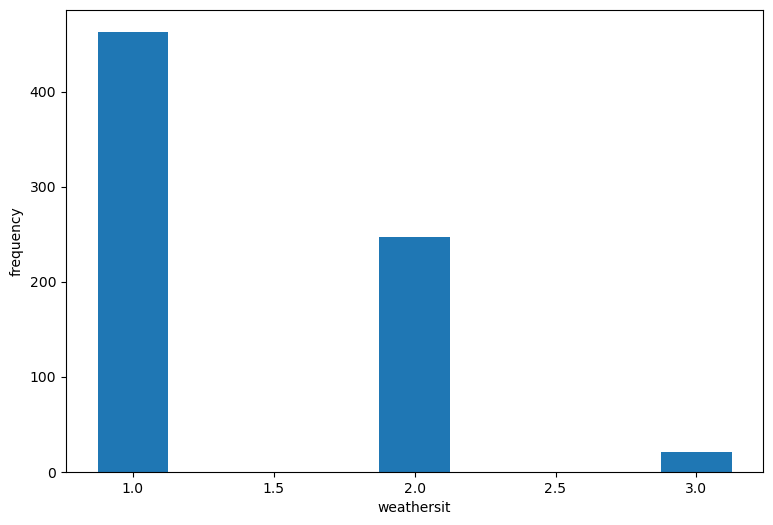

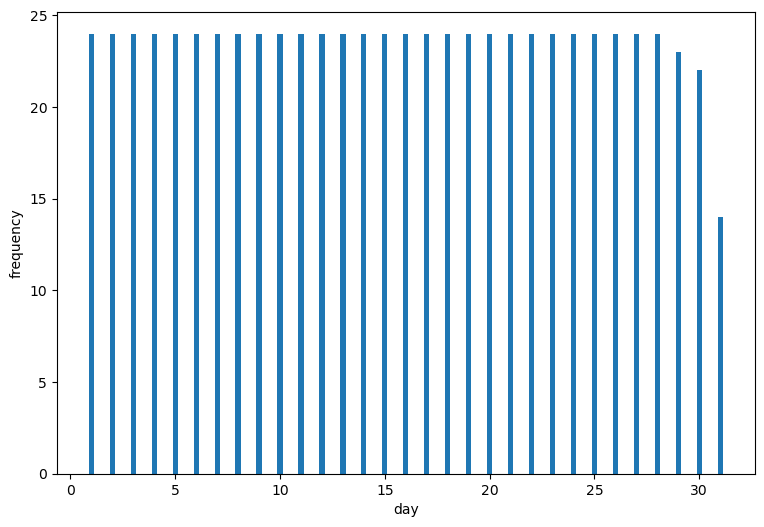

In [70]:
# Bar plots for categorical features 
cate_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']
for col in cate_features:
    counts = df[col].value_counts().sort_index()
    fig, ax = plt.subplots(1, 1, figsize = (9, 6))
    ax.bar(counts.index, counts, width = 0.25)
    ax.set_xlabel(col)
    ax.set_ylabel('frequency')
plt.show()


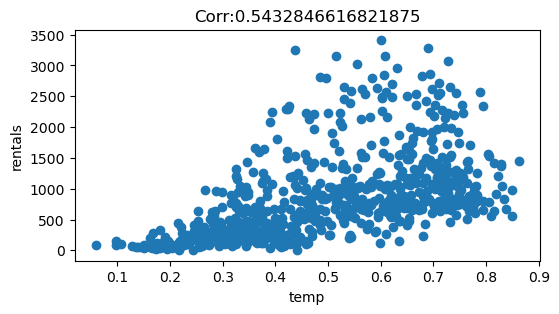

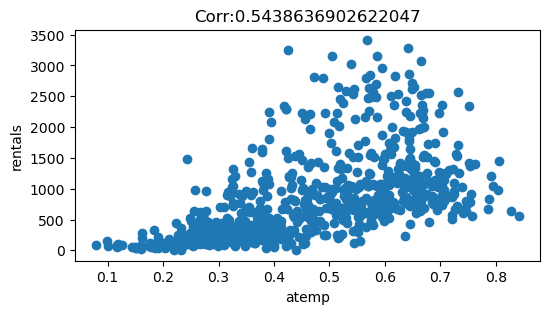

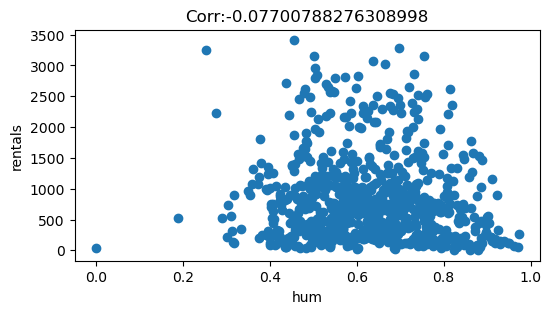

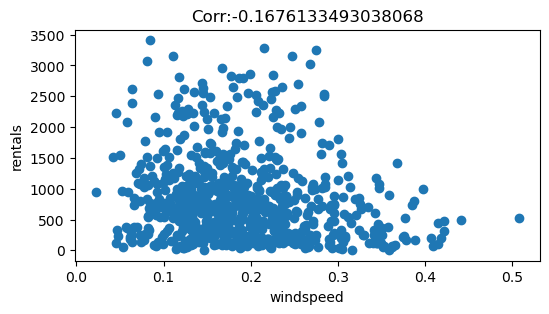

In [71]:
#Scatter plots: numerical features vs. label with correlation
for col in num_features:
    fig, ax = plt.subplots(1, 1, figsize = (6, 3))
    correlation = df[col].corr(df['rentals'])
    ax.scatter(df[col], df['rentals'])
    ax.set_xlabel(col)
    ax.set_ylabel('rentals')
    ax.set_title(f'Corr:{correlation}')
plt.show()

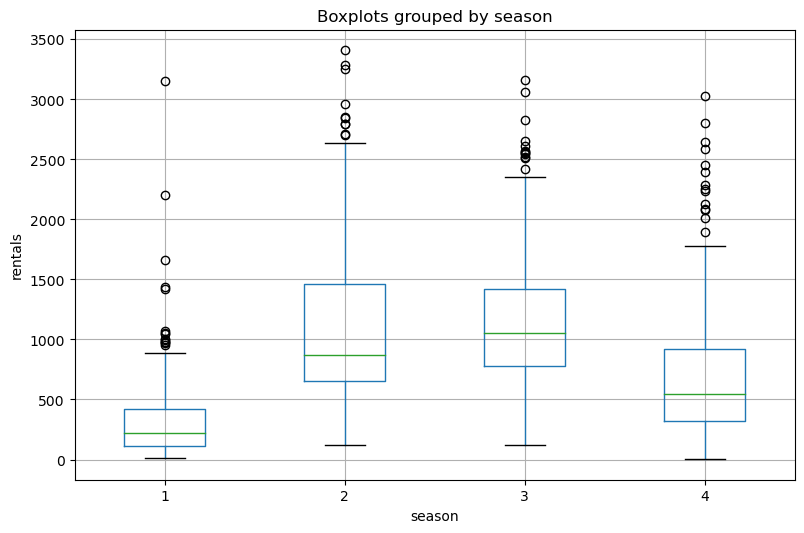

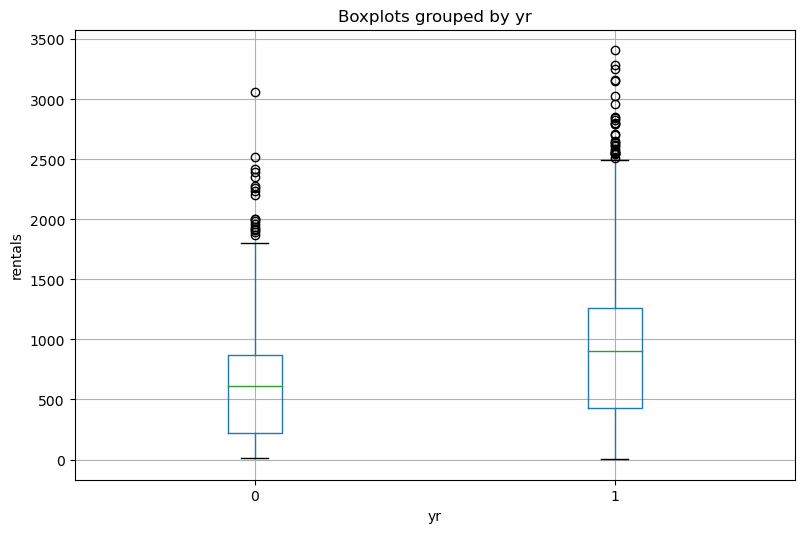

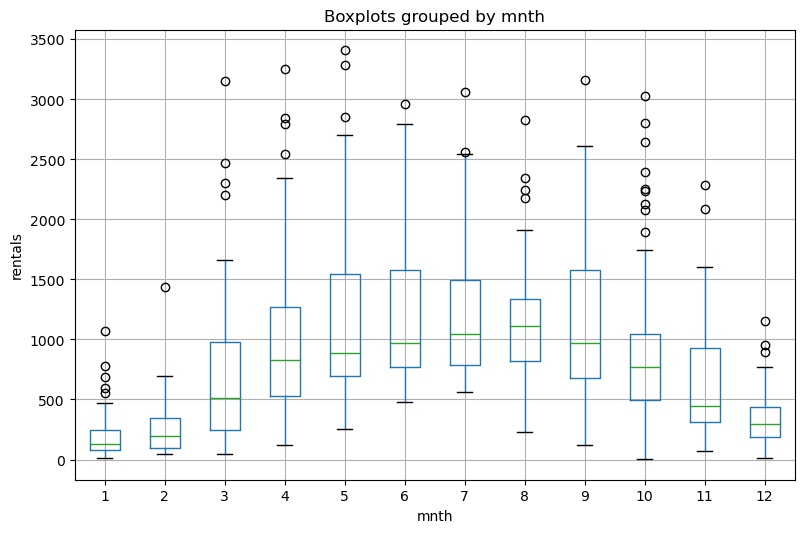

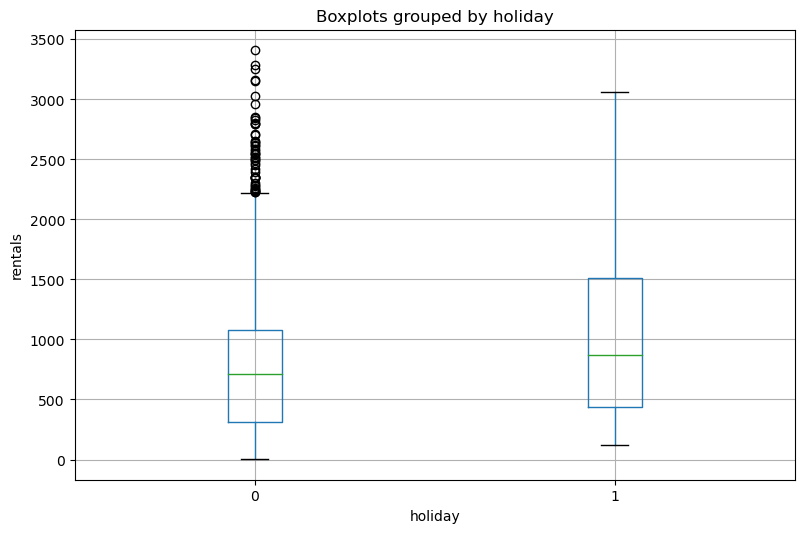

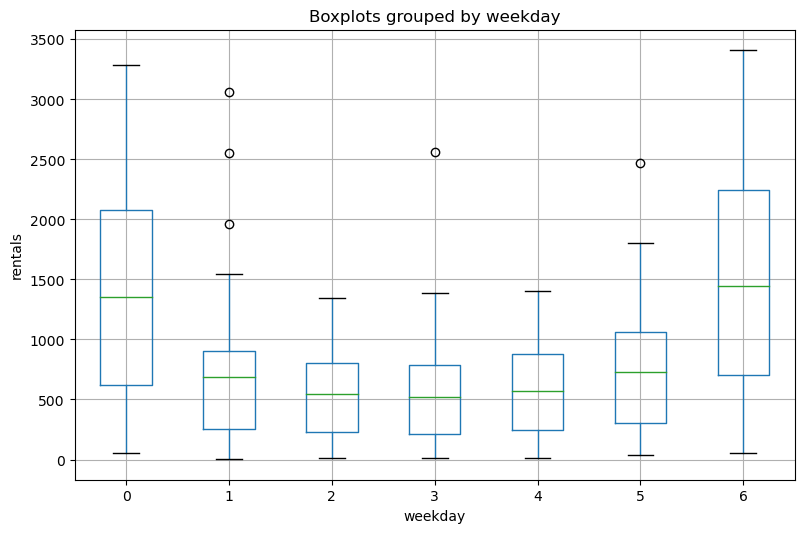

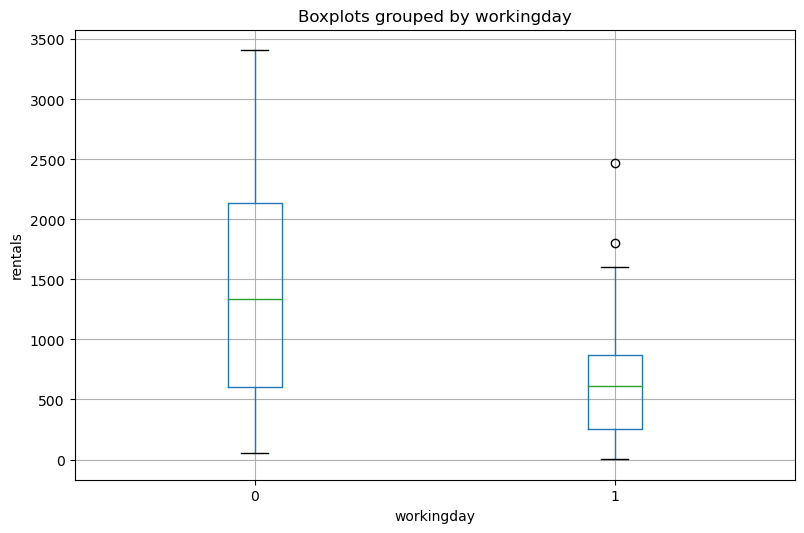

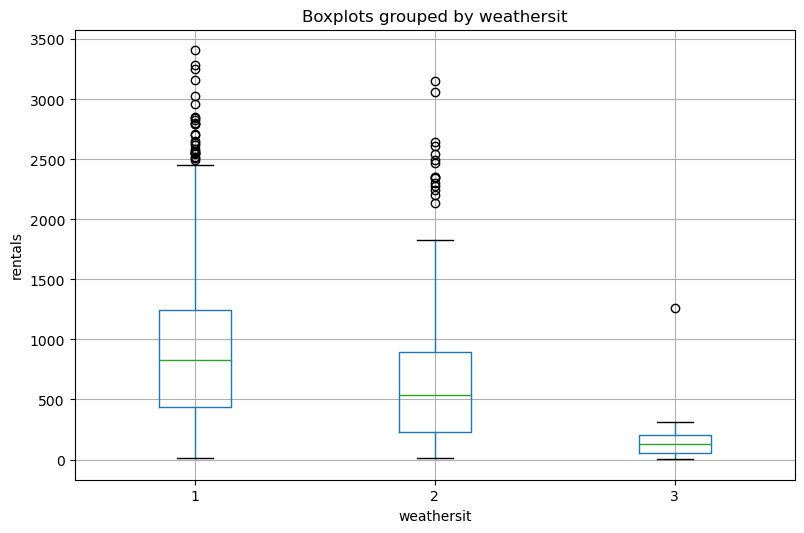

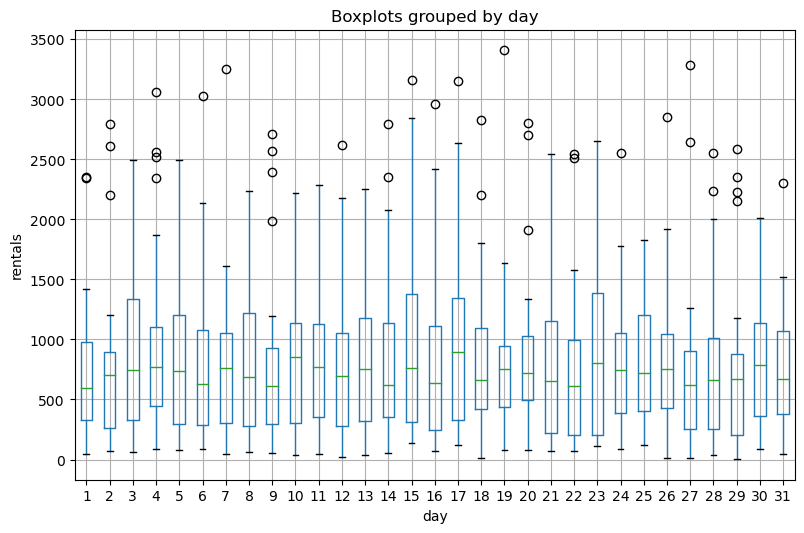

In [72]:
# Boxplots for categorical features 
for col in cate_features:
    fig, ax = plt.subplots(1, 1, figsize = (9, 6))
    df.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_xlabel(col)
    ax.set_ylabel('rentals')
    ax.set_title('Boxplots grouped by ' + col)
    fig.suptitle('')
plt.show()

<h3> Training and validating a regression model </h3>

In [73]:
# Separate features and labels
X, y = df[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, df['rentals'].values
print('features: ', X[:5])
print('label:', y[:5])

features:  [[1.       1.       0.       6.       0.       2.       0.344167 0.363625
  0.805833 0.160446]
 [1.       1.       0.       0.       0.       2.       0.363478 0.353739
  0.696087 0.248539]
 [1.       1.       0.       1.       1.       1.       0.196364 0.189405
  0.437273 0.248309]
 [1.       1.       0.       2.       1.       1.       0.2      0.212122
  0.590435 0.160296]
 [1.       1.       0.       3.       1.       1.       0.226957 0.22927
  0.436957 0.1869  ]]
label: [331 131 120 108  82]


In [74]:
from sklearn.model_selection import train_test_split
# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)


In [75]:
# Train the model
from sklearn.linear_model import LinearRegression
# Fit a linear regression model on the training data
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [76]:
y_test_pred = model.predict(X_test)
#np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(y_test_pred)[:10])
print('Actual labels   : ' ,y_test[:10])


Predicted labels:  [1268. 1668.  448. 1003.  991.  923.  326. 1106.  597.   26.]
Actual labels   :  [1138 2172  795  954  692  251  425  888  555  130]


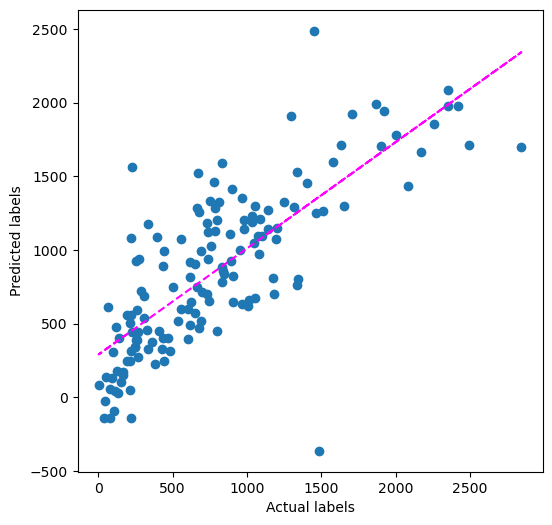

linear regression mse: 155390.88445931947
linear regression r2: 0.5651500224003583


In [77]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.scatter(y_test, y_test_pred, color = 'tab:blue')
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels')
# overlay the regression line
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta', linestyle = 'dashed')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('linear regression mse:', mse)
print('linear regression r2:', r2)

DecisionTreeRegressor() 

|--- feature_7 <= 0.42
|   |--- feature_7 <= 0.31
|   |   |--- feature_6 <= 0.24
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_7 <= 0.17
|   |   |   |   |   |   |--- feature_9 <= 0.26
|   |   |   |   |   |   |   |--- feature_9 <= 0.19
|   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   |   |   |   |   |--- feature_9 >  0.19
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |   |   |--- value: [196.00]
|   |   |   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |   |   |--- value: [150.00]
|   |   |   |   |   |   |--- feature_9 >  0.26
|   |   |   |   |   |   |   |--- feature_8 <= 0.45
|   |   |   |   |   |   |   |   |--- value: [54.00]
|   |   |   |   |   |   |   |--- feature_8 >  0.45
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.34
|   |   |   |   |   |   |   |   |   |--- value: [68.00]
|   |   |   |   |   |   |   |   |--- fe

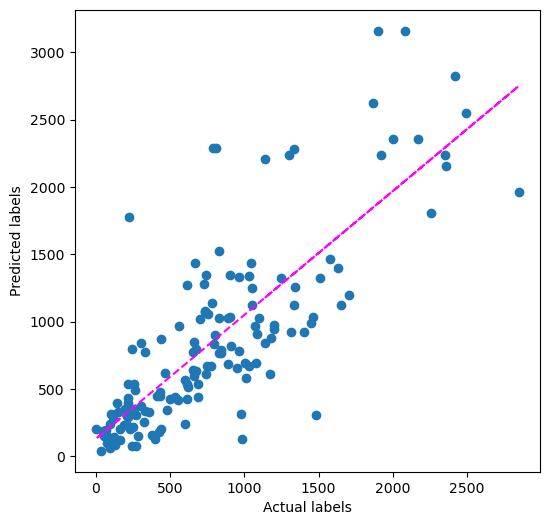

Decision Tree mse: 176872.0544217687
Decision Tree regression r2: 0.5050365459278655


In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

y_test_pred = model.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.scatter(y_test, y_test_pred, color = 'tab:blue')
ax.set_xlabel('Actual labels')
ax.set_ylabel('Predicted labels')
# overlay the regression line
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta', linestyle = 'dashed')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('Decision Tree mse:', mse)
print('Decision Tree regression r2:', r2)

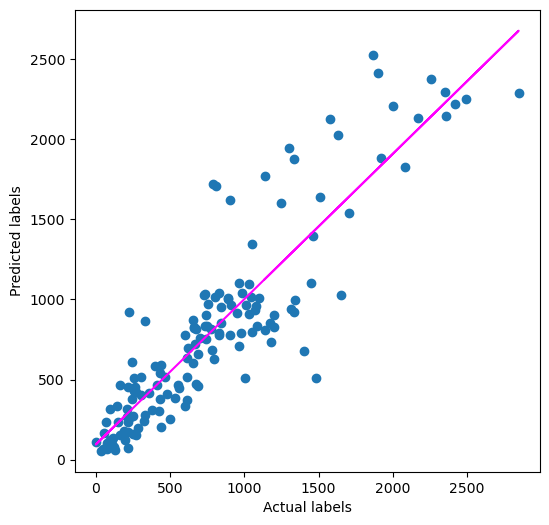

GradientBoostingRegressor()
mse: 78523.73027008287
r2: 0.7802571079520105


In [79]:
def get_metrics(mod):
    
    y_test_pred = model.predict(X_test)
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
    ax.scatter(y_test, y_test_pred, color = 'tab:blue')
    ax.set_xlabel('Actual labels')
    ax.set_ylabel('Predicted labels')
    # overlay the regression line
    z = np.polyfit(y_test, y_test_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta', linestyle = 'solid')
    plt.show()

    from sklearn.metrics import mean_squared_error, r2_score 
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(model)
    print('mse:', mse)
    print('r2:', r2)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)
get_metrics(model)

<h3> Hyperparameters Tuning with Grid Search and Cross Validation </h3>

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer 
alg = GradientBoostingRegressor().fit(X_train, y_train)
params = {'learning_rate':[0.01,0.1,0.5],'n_estimators':[50,100,150]}
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring = score, cv = 5, return_train_score=True)
gridsearch.fit(X_train, y_train)
for k, v in gridsearch.best_params_.items():
    print('best model hyperparameters:\n', k, ':', v)
model = gridsearch.best_estimator_
predictions = model.predict(X_test)
mse = mean_squared_error(predictions, y_test)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(predictions, y_test)
print('r2:', r2)

best model hyperparameters:
 learning_rate : 0.1
best model hyperparameters:
 n_estimators : 50
MSE: 80370.13765383273
RMSE: 283.4962744972722
r2: 0.7600071970103561


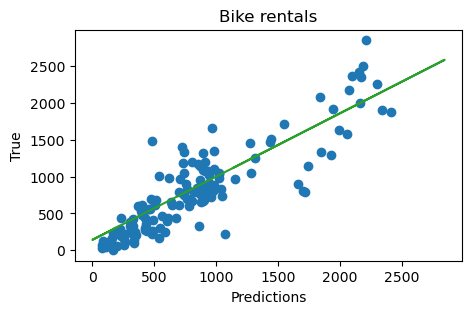

In [81]:
fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.scatter(predictions, y_test)
ax.set_xlabel('Predictions')
ax.set_ylabel('True')
ax.set_title('Bike rentals')
#adding a regression line 
z = np.polyfit(y_test, predictions,1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'tab:green')
plt.show()